<a href="https://colab.research.google.com/github/tsagandanilova/finalproject/blob/main/final_project_%D0%B4%D0%B0%D0%BD%D0%B8%D0%BB%D0%BE%D0%B2%D0%B0_%D1%86ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ПРОЕКТ:Анализ экономических данных с использованием FRED API**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px # для визуализации

#### 1. Установка API(Application Programming Interface)

In [ ]:
!pip install fredapi > /dev/null # для работы с данными на сайте FRED, /dev/null используется, чтобы скрыть процесс установки

In [ ]:
from fredapi import Fred
with open('/content/api_key.txt', 'r') as f:
  fred_key = f.read()

#### 2.Создание объекта

In [ ]:
fred = Fred(api_key=fred_key)

In [ ]:
fred.search('unemployment')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2022-12-08,2022-12-08,Unemployment Rate,1948-01-01,2022-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-12-02 07:44:02-06:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2022-12-08,2022-12-08,Unemployment Rate,1948-01-01,2022-11-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-12-02 07:43:03-06:00,58,The unemployment rate represents the number of...
NROU,NROU,2022-12-08,2022-12-08,Noncyclical Rate of Unemployment,1949-01-01,2032-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2022-05-26 13:45:04-05:00,71,"Starting with the July, 2021 report: An Update..."
UNEMPLOY,UNEMPLOY,2022-12-08,2022-12-08,Unemployment Level,1948-01-01,2022-11-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2022-12-02 07:44:06-06:00,69,The series comes from the 'Current Population ...
CCSA,CCSA,2022-12-08,2022-12-08,Continued Claims (Insured Unemployment),1967-01-07,2022-11-26,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2022-12-08 07:33:03-06:00,71,"Continued claims, also referred to as insured ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FLSARA5URN,FLSARA5URN,2022-12-08,2022-12-08,"Unemployment Rate in Sarasota County, FL",1990-01-01,2022-10-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-12-01 10:24:04-06:00,10,These data come from the Current Population Su...
ILDUPA0URN,ILDUPA0URN,2022-12-08,2022-12-08,"Unemployment Rate in DuPage County, IL",1990-01-01,2022-10-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-12-01 10:14:03-06:00,10,These data come from the Current Population Su...
NYULST0URN,NYULST0URN,2022-12-08,2022-12-08,"Unemployment Rate in Ulster County, NY",1990-01-01,2022-10-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-12-01 10:11:04-06:00,10,These data come from the Current Population Su...


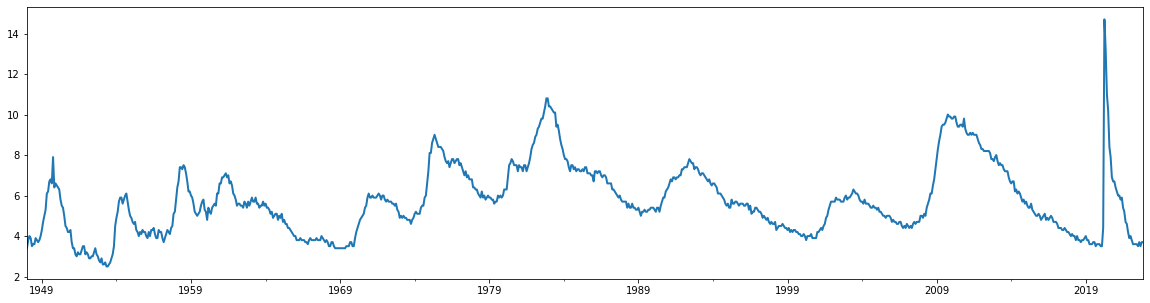

In [ ]:
unrate = fred.get_series('UNRATE') # выделим данные, которые содержат  UNRATE в столбце id  
unrate.plot(figsize=(20,5), lw=2)
# на графике представлена динамика изменения уровня безработицы в США

## *ДАТАСЕТ 1: БЕЗРАБОТИЦА*

In [ ]:
unemp_df = fred.search('Unemployment Rate State', filter=('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['id'].str.contains('UR')]
unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CAUR,CAUR,2022-12-08,2022-12-08,Unemployment Rate in California,1976-01-01,2022-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-11-18 12:17:13-06:00,59,None
TXUR,TXUR,2022-12-08,2022-12-08,Unemployment Rate in Texas,1976-01-01,2022-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-11-18 12:14:04-06:00,51,None
NYUR,NYUR,2022-12-08,2022-12-08,Unemployment Rate in New York,1976-01-01,2022-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-11-18 12:16:50-06:00,51,None
FLUR,FLUR,2022-12-08,2022-12-08,Unemployment Rate in Florida,1976-01-01,2022-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-11-18 12:17:23-06:00,50,None
OHUR,OHUR,2022-12-08,2022-12-08,Unemployment Rate in Ohio,1976-01-01,2022-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-11-18 12:15:35-06:00,43,None
ALUR,ALUR,2022-12-08,2022-12-08,Unemployment Rate in Alabama,1976-01-01,2022-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-11-18 12:17:06-06:00,39,None
PAUR,PAUR,2022-12-08,2022-12-08,Unemployment Rate in Pennsylvania,1976-01-01,2022-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-11-18 12:15:41-06:00,38,None
MIUR,MIUR,2022-12-08,2022-12-08,Unemployment Rate in Michigan,1976-01-01,2022-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-11-18 12:16:29-06:00,36,None
KYUR,KYUR,2022-12-08,2022-12-08,Unemployment Rate in Kentucky,1976-01-01,2022-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-11-18 12:16:17-06:00,27,None


In [ ]:
unemp_df.index

Index(['CAUR', 'TXUR', 'NYUR', 'FLUR', 'OHUR', 'ALUR', 'PAUR', 'MIUR', 'KYUR',
       'MNUR', 'MAUR', 'COUR', 'ILUR', 'WAUR', 'GAUR', 'NCUR', 'NJUR', 'TNUR',
       'MOUR', 'AZUR', 'VAUR', 'INUR', 'WIUR', 'WVUR', 'ORUR', 'NMUR', 'LAUR',
       'UTUR', 'AKUR', 'SCUR', 'NDUR', 'NVUR', 'IAUR', 'ARUR', 'MSUR', 'CTUR',
       'OKUR', 'MDUR', 'NEUR', 'HIUR', 'KSUR', 'MEUR', 'SDUR', 'MTUR', 'IDUR',
       'PRUR', 'WYUR', 'RIUR', 'DCUR', 'NHUR', 'VTUR', 'DEUR', 'CMWRUR',
       'CNERUR', 'CSOUUR', 'CNEWUR', 'CWSTUR'],
      dtype='object', name='series id')

In [ ]:
len(unemp_df)

57

In [ ]:
all_results = []

for id in unemp_df.index:
    results = fred.get_series(id)
    results = results.to_frame(name=id)
    all_results.append(results)

In [ ]:
all_results[2] # к примеру, данные по уровню безработицы в конкретном штате


,NYUR
1976-01-01,10.3
1976-02-01,10.3
1976-03-01,10.2
1976-04-01,10.2
1976-05-01,10.1
...,...
2022-06-01,4.4
2022-07-01,4.3
2022-08-01,4.7
2022-09-01,4.3


In [ ]:
pd.concat(all_results, axis=1)

,CAUR,TXUR,NYUR,FLUR,OHUR,ALUR,PAUR,MIUR,KYUR,MNUR,...,RIUR,DCUR,NHUR,VTUR,DEUR,CMWRUR,CNERUR,CSOUUR,CNEWUR,CWSTUR
1976-01-01,9.2,5.8,10.3,9.7,8.1,6.6,8.0,9.9,5.6,6.0,...,7.8,8.7,6.5,8.6,8.0,6.8,9.6,6.9,9.6,8.6
1976-02-01,9.2,5.8,10.3,9.7,8.1,6.6,8.1,9.9,5.6,6.0,...,7.8,8.7,6.5,8.6,8.0,6.8,9.6,6.9,9.6,8.6
1976-03-01,9.1,5.9,10.2,9.6,8.1,6.6,8.1,9.9,5.6,5.9,...,7.7,8.6,6.5,8.6,8.0,6.8,9.6,6.9,9.6,8.6
1976-04-01,9.1,5.9,10.2,9.5,8.0,6.5,8.1,9.8,5.6,5.8,...,7.7,8.5,6.5,8.6,8.1,6.7,9.5,6.8,9.4,8.5
1976-05-01,9.0,5.9,10.1,9.3,7.8,6.4,8.1,9.6,5.5,5.7,...,7.7,8.4,6.5,8.5,8.3,6.6,9.5,6.7,9.3,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-01,4.2,4.1,4.4,2.8,3.9,2.6,4.5,4.3,3.7,1.8,...,2.7,5.5,2.0,2.2,4.5,3.3,4.1,3.4,3.5,3.8
2022-07-01,3.9,4.0,4.3,2.7,3.9,2.6,4.3,4.2,3.7,1.8,...,2.7,5.2,2.0,2.1,4.4,3.3,4.0,3.4,3.3,3.7
2022-08-01,4.1,4.1,4.7,2.7,4.0,2.6,4.2,4.1,3.8,1.9,...,2.8,5.1,2.0,2.1,4.5,3.4,4.1,3.4,3.4,3.7
2022-09-01,3.8,4.0,4.3,2.5,4.0,2.6,4.1,4.1,3.8,2.0,...,3.1,4.7,2.2,2.1,4.3,3.4,3.9,3.3,3.3,3.7


In [ ]:
states = pd.concat(all_results, axis=1).drop(['CNERUR','CMWRUR', 'CSOUUR', 'CWSTUR', 'CNEWUR'], axis=1)

In [ ]:
states

,CAUR,TXUR,NYUR,FLUR,OHUR,ALUR,PAUR,MIUR,KYUR,MNUR,...,SDUR,MTUR,IDUR,PRUR,WYUR,RIUR,DCUR,NHUR,VTUR,DEUR
1976-01-01,9.2,5.8,10.3,9.7,8.1,6.6,8.0,9.9,5.6,6.0,...,3.3,5.8,5.6,19.6,4.1,7.8,8.7,6.5,8.6,8.0
1976-02-01,9.2,5.8,10.3,9.7,8.1,6.6,8.1,9.9,5.6,6.0,...,3.3,5.8,5.6,19.5,4.1,7.8,8.7,6.5,8.6,8.0
1976-03-01,9.1,5.9,10.2,9.6,8.1,6.6,8.1,9.9,5.6,5.9,...,3.2,5.8,5.6,19.3,4.1,7.7,8.6,6.5,8.6,8.0
1976-04-01,9.1,5.9,10.2,9.5,8.0,6.5,8.1,9.8,5.6,5.8,...,3.1,5.8,5.6,19.0,4.0,7.7,8.5,6.5,8.6,8.1
1976-05-01,9.0,5.9,10.1,9.3,7.8,6.4,8.1,9.6,5.5,5.7,...,3.1,5.8,5.6,18.9,3.9,7.7,8.4,6.5,8.5,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-01,4.2,4.1,4.4,2.8,3.9,2.6,4.5,4.3,3.7,1.8,...,2.3,2.6,2.5,6.1,3.1,2.7,5.5,2.0,2.2,4.5
2022-07-01,3.9,4.0,4.3,2.7,3.9,2.6,4.3,4.2,3.7,1.8,...,2.3,2.7,2.6,5.9,3.0,2.7,5.2,2.0,2.1,4.4
2022-08-01,4.1,4.1,4.7,2.7,4.0,2.6,4.2,4.1,3.8,1.9,...,2.3,2.8,2.7,5.8,3.1,2.8,5.1,2.0,2.1,4.5
2022-09-01,3.8,4.0,4.3,2.5,4.0,2.6,4.1,4.1,3.8,2.0,...,2.3,2.9,2.8,NaN,3.3,3.1,4.7,2.2,2.1,4.3


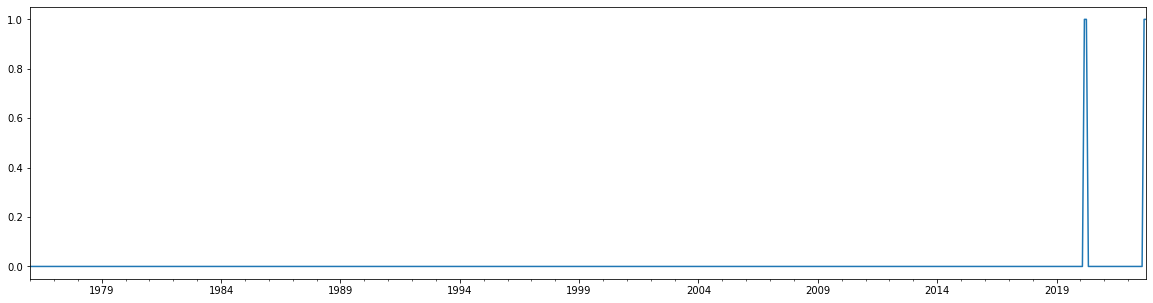

In [ ]:
states.isna().sum(axis=1).plot(figsize=(20,5))

In [ ]:
data = states.dropna()
data

,CAUR,TXUR,NYUR,FLUR,OHUR,ALUR,PAUR,MIUR,KYUR,MNUR,...,SDUR,MTUR,IDUR,PRUR,WYUR,RIUR,DCUR,NHUR,VTUR,DEUR
1976-01-01,9.2,5.8,10.3,9.7,8.1,6.6,8.0,9.9,5.6,6.0,...,3.3,5.8,5.6,19.6,4.1,7.8,8.7,6.5,8.6,8.0
1976-02-01,9.2,5.8,10.3,9.7,8.1,6.6,8.1,9.9,5.6,6.0,...,3.3,5.8,5.6,19.5,4.1,7.8,8.7,6.5,8.6,8.0
1976-03-01,9.1,5.9,10.2,9.6,8.1,6.6,8.1,9.9,5.6,5.9,...,3.2,5.8,5.6,19.3,4.1,7.7,8.6,6.5,8.6,8.0
1976-04-01,9.1,5.9,10.2,9.5,8.0,6.5,8.1,9.8,5.6,5.8,...,3.1,5.8,5.6,19.0,4.0,7.7,8.5,6.5,8.6,8.1
1976-05-01,9.0,5.9,10.1,9.3,7.8,6.4,8.1,9.6,5.5,5.7,...,3.1,5.8,5.6,18.9,3.9,7.7,8.4,6.5,8.5,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,4.6,4.3,4.5,3.0,4.0,2.8,4.8,4.3,3.9,2.2,...,2.3,2.3,2.6,6.4,3.3,3.2,5.8,2.3,2.5,4.5
2022-05-01,4.3,4.2,4.4,2.9,3.9,2.7,4.6,4.3,3.8,2.0,...,2.3,2.4,2.5,6.2,3.2,2.9,5.7,2.1,2.3,4.5
2022-06-01,4.2,4.1,4.4,2.8,3.9,2.6,4.5,4.3,3.7,1.8,...,2.3,2.6,2.5,6.1,3.1,2.7,5.5,2.0,2.2,4.5
2022-07-01,3.9,4.0,4.3,2.7,3.9,2.6,4.3,4.2,3.7,1.8,...,2.3,2.7,2.6,5.9,3.0,2.7,5.2,2.0,2.1,4.4


## *ВИЗУАЛИЗАЦИЯ ДАННЫХ*

In [ ]:
px.line(data)

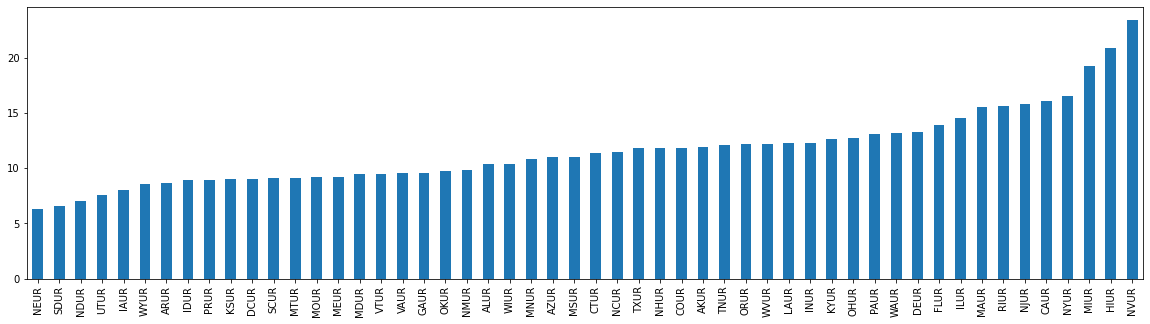

In [ ]:
data.loc[data.index == '2020-05-01'].T.sort_values('2020-05-01').plot(kind='bar',figsize=(20,5)).legend().remove()

In [ ]:
data.loc[data.index=='2020-05-01', data.columns=='NEUR']

,NEUR
2020-05-01,6.3


In [ ]:
data.loc[data.index=='2020-05-01', data.columns=='NVUR']

,NVUR
2020-05-01,23.4


In [ ]:
titles = unemp_df['title'].str.replace('Unemployment Rate in', '').to_dict()
titles

{'CAUR': ' California',
 'TXUR': ' Texas',
 'NYUR': ' New York',
 'FLUR': ' Florida',
 'OHUR': ' Ohio',
 'ALUR': ' Alabama',
 'PAUR': ' Pennsylvania',
 'MIUR': ' Michigan',
 'KYUR': ' Kentucky',
 'MNUR': ' Minnesota',
 'MAUR': ' Massachusetts',
 'COUR': ' Colorado',
 'ILUR': ' Illinois',
 'WAUR': ' Washington',
 'GAUR': ' Georgia',
 'NCUR': ' North Carolina',
 'NJUR': ' New Jersey',
 'TNUR': ' Tennessee',
 'MOUR': ' Missouri',
 'AZUR': ' Arizona',
 'VAUR': ' Virginia',
 'INUR': ' Indiana',
 'WIUR': ' Wisconsin',
 'WVUR': ' West Virginia',
 'ORUR': ' Oregon',
 'NMUR': ' New Mexico',
 'LAUR': ' Louisiana',
 'UTUR': ' Utah',
 'AKUR': ' Alaska',
 'SCUR': ' South Carolina',
 'NDUR': ' North Dakota',
 'NVUR': ' Nevada',
 'IAUR': ' Iowa',
 'ARUR': ' Arkansas',
 'MSUR': ' Mississippi',
 'CTUR': ' Connecticut',
 'OKUR': ' Oklahoma',
 'MDUR': ' Maryland',
 'NEUR': ' Nebraska',
 'HIUR': ' Hawaii',
 'KSUR': ' Kansas',
 'MEUR': ' Maine',
 'SDUR': ' South Dakota',
 'MTUR': ' Montana',
 'IDUR': ' Ida

In [ ]:
states.columns = [titles[i] for i in states.columns]

In [ ]:
dataset =states.dropna()
dataset

,California,Texas,New York,Florida,Ohio,Alabama,Pennsylvania,Michigan,Kentucky,Minnesota,...,South Dakota,Montana,Idaho,Puerto Rico,Wyoming,Rhode Island,the District of Columbia,New Hampshire,Vermont,Delaware
1976-01-01,9.2,5.8,10.3,9.7,8.1,6.6,8.0,9.9,5.6,6.0,...,3.3,5.8,5.6,19.6,4.1,7.8,8.7,6.5,8.6,8.0
1976-02-01,9.2,5.8,10.3,9.7,8.1,6.6,8.1,9.9,5.6,6.0,...,3.3,5.8,5.6,19.5,4.1,7.8,8.7,6.5,8.6,8.0
1976-03-01,9.1,5.9,10.2,9.6,8.1,6.6,8.1,9.9,5.6,5.9,...,3.2,5.8,5.6,19.3,4.1,7.7,8.6,6.5,8.6,8.0
1976-04-01,9.1,5.9,10.2,9.5,8.0,6.5,8.1,9.8,5.6,5.8,...,3.1,5.8,5.6,19.0,4.0,7.7,8.5,6.5,8.6,8.1
1976-05-01,9.0,5.9,10.1,9.3,7.8,6.4,8.1,9.6,5.5,5.7,...,3.1,5.8,5.6,18.9,3.9,7.7,8.4,6.5,8.5,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,4.6,4.3,4.5,3.0,4.0,2.8,4.8,4.3,3.9,2.2,...,2.3,2.3,2.6,6.4,3.3,3.2,5.8,2.3,2.5,4.5
2022-05-01,4.3,4.2,4.4,2.9,3.9,2.7,4.6,4.3,3.8,2.0,...,2.3,2.4,2.5,6.2,3.2,2.9,5.7,2.1,2.3,4.5
2022-06-01,4.2,4.1,4.4,2.8,3.9,2.6,4.5,4.3,3.7,1.8,...,2.3,2.6,2.5,6.1,3.1,2.7,5.5,2.0,2.2,4.5
2022-07-01,3.9,4.0,4.3,2.7,3.9,2.6,4.3,4.2,3.7,1.8,...,2.3,2.7,2.6,5.9,3.0,2.7,5.2,2.0,2.1,4.4


In [ ]:
px.line(dataset)

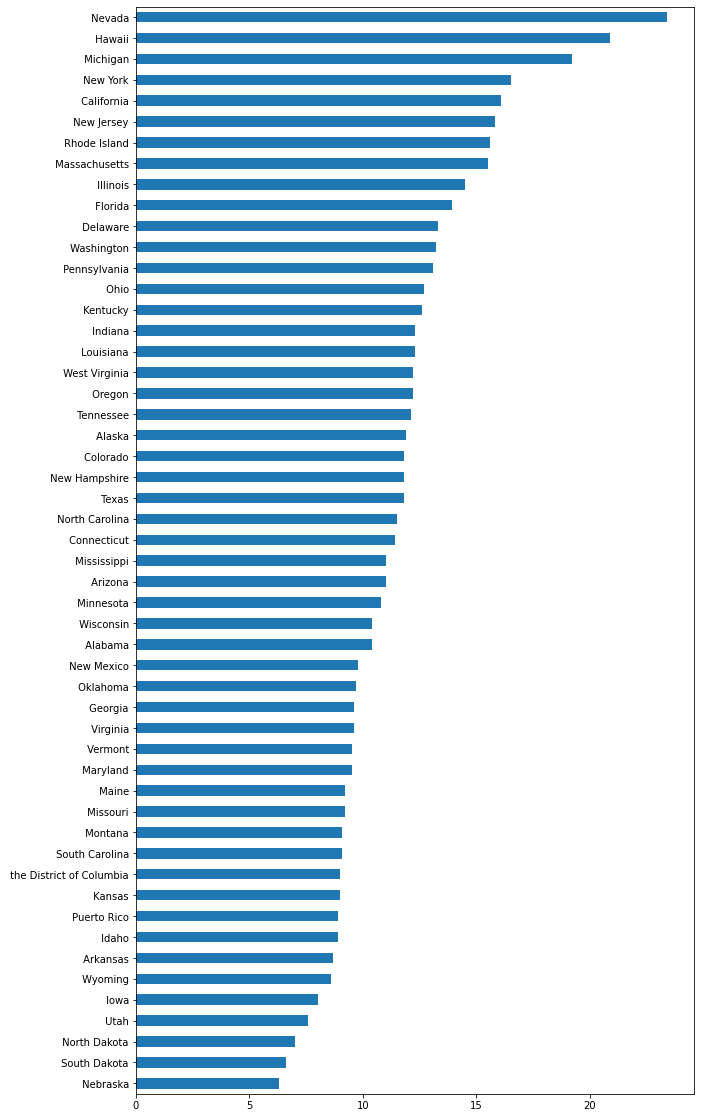

In [ ]:
dataset.loc[dataset.index == '2020-05-01'].T.sort_values('2020-05-01').plot(kind='barh',figsize=(10,20)).legend().remove()

## *НОВЫЙ ДАТАСЕТ (Занятость)*

In [ ]:
partic_df = fred.search('Labor Force Participation Rate for', filter=('frequency','Monthly'))
partic_df = partic_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
partic_df = partic_df.loc[partic_df['id'].str.contains('LBSS')]
partic_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
LBSSA06,LBSSA06,2022-12-08,2022-12-08,Labor Force Participation Rate for California,1976-01-01,2022-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-11-18 09:01:03-06:00,22,A state's labor-force participation rate is th...
LBSSA27,LBSSA27,2022-12-08,2022-12-08,Labor Force Participation Rate for Minnesota,1976-01-01,2022-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-11-18 09:01:02-06:00,31,A state's labor-force participation rate is th...
LBSSA01,LBSSA01,2022-12-08,2022-12-08,Labor Force Participation Rate for Alabama,1976-01-01,2022-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-11-18 09:01:06-06:00,12,A state's labor-force participation rate is th...
LBSSA36,LBSSA36,2022-12-08,2022-12-08,Labor Force Participation Rate for New York,1976-01-01,2022-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-11-18 09:01:04-06:00,28,A state's labor-force participation rate is th...
LBSSA12,LBSSA12,2022-12-08,2022-12-08,Labor Force Participation Rate for Florida,1976-01-01,2022-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-11-18 09:01:03-06:00,28,A state's labor-force participation rate is th...
LBSSA55,LBSSA55,2022-12-08,2022-12-08,Labor Force Participation Rate for Wisconsin,1976-01-01,2022-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-11-18 09:01:03-06:00,27,A state's labor-force participation rate is th...
LBSSA21,LBSSA21,2022-12-08,2022-12-08,Labor Force Participation Rate for Kentucky,1976-01-01,2022-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-11-18 09:01:03-06:00,26,A state's labor-force participation rate is th...
LBSSA48,LBSSA48,2022-12-08,2022-12-08,Labor Force Participation Rate for Texas,1976-01-01,2022-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-11-18 09:01:04-06:00,25,A state's labor-force participation rate is th...
LBSSA26,LBSSA26,2022-12-08,2022-12-08,Labor Force Participation Rate for Michigan,1976-01-01,2022-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-11-18 09:01:03-06:00,26,A state's labor-force participation rate is th...


In [ ]:
titles_p = partic_df['title'].str.replace('Labor Force Participation Rate for', '').to_dict()
titles_p

{'LBSSA06': ' California',
 'LBSSA27': ' Minnesota',
 'LBSSA01': ' Alabama',
 'LBSSA36': ' New York',
 'LBSSA12': ' Florida',
 'LBSSA55': ' Wisconsin',
 'LBSSA21': ' Kentucky',
 'LBSSA48': ' Texas',
 'LBSSA26': ' Michigan',
 'LBSSA47': ' Tennessee',
 'LBSSA39': ' Ohio',
 'LBSSA13': ' Georgia',
 'LBSSA18': ' Indiana',
 'LBSSA37': ' North Carolina',
 'LBSSA19': ' Iowa',
 'LBSSA08': ' Colorado',
 'LBSSA51': ' Virginia',
 'LBSSA17': ' Illinois',
 'LBSSA45': ' South Carolina',
 'LBSSA23': ' Maine',
 'LBSSA28': ' Mississippi',
 'LBSSA42': ' Pennsylvania',
 'LBSSA25': ' Massachusetts',
 'LBSSA35': ' New Mexico',
 'LBSSA24': ' Maryland',
 'LBSSA31': ' Nebraska',
 'LBSSA49': ' Utah',
 'LBSSA20': ' Kansas',
 'LBSSA54': ' West Virginia',
 'LBSSA04': ' Arizona',
 'LBSSA29': ' Missouri',
 'LBSSA32': ' Nevada',
 'LBSSA41': ' Oregon',
 'LBSSA09': ' Connecticut',
 'LBSSA05': ' Arkansas',
 'LBSSA53': ' Washington',
 'LBSSA15': ' Hawaii',
 'LBSSA40': ' Oklahoma',
 'LBSSA02': ' Alaska',
 'LBSSA33': ' New

In [ ]:
all_results_p =[]
for i in partic_df.index:
    results_p = fred.get_series(i)
    results_p = results_p.to_frame(name=i)
    all_results_p.append(results_p)

In [ ]:
pd.concat(all_results_p, axis=1)
states_p = pd.concat(all_results_p, axis=1)
states_p.columns = [titles_p[i] for i in states_p.columns]
states_p
dataset2 = states_p.dropna()
dataset2

,California,Minnesota,Alabama,New York,Florida,Wisconsin,Kentucky,Texas,Michigan,Tennessee,...,New Jersey,Idaho,Montana,North Dakota,District Of Columbia,Vermont,Wyoming,South Dakota,Delaware,Rhode Island
1976-01-01,62.6,65.6,57.0,58.0,55.8,65.6,60.5,63.8,61.6,59.6,...,61.5,63.0,62.7,62.6,64.4,63.6,65.3,64.6,62.7,63.8
1976-02-01,62.4,65.5,56.9,58.0,55.7,65.5,60.3,63.5,61.5,59.4,...,61.4,62.8,62.5,62.4,64.5,63.4,64.9,64.4,62.5,63.7
1976-03-01,62.2,65.4,56.8,58.0,55.5,65.4,60.2,63.4,61.5,59.3,...,61.4,62.7,62.4,62.3,64.5,63.2,64.7,64.4,62.5,63.6
1976-04-01,62.2,65.4,56.8,58.0,55.5,65.4,60.1,63.5,61.6,59.3,...,61.5,62.7,62.3,62.5,64.5,63.5,64.9,64.3,62.4,63.7
1976-05-01,62.3,65.5,56.8,58.1,55.4,65.5,60.1,63.6,61.7,59.4,...,61.6,62.8,62.2,62.6,64.4,63.6,65.2,64.3,62.4,63.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-01,62.5,68.5,57.2,60.1,59.3,66.4,58.1,63.8,60.1,61.2,...,62.9,62.5,62.6,69.3,72.9,61.6,63.5,68.9,61.2,63.4
2022-07-01,62.4,68.4,57.2,60.3,59.3,66.2,58.1,63.8,60.1,61.1,...,63.0,62.6,62.6,69.1,73.0,61.7,63.4,68.9,61.1,63.6
2022-08-01,62.5,68.2,57.2,60.5,59.5,65.9,58.0,63.8,60.1,60.8,...,63.3,62.7,62.7,69.0,73.0,61.8,63.2,68.9,61.0,63.7
2022-09-01,62.3,68.1,57.2,60.3,59.5,65.6,58.0,63.6,60.1,60.5,...,63.0,62.7,62.6,68.8,72.7,61.8,63.1,68.7,60.8,63.9


In [ ]:
dataset2[' Puerto Rico'] = ''

In [ ]:
px.line(dataset2)

# **ОБЪЕДИНЕНИЕ ДАННЫХ**

памятка: 

dataset - название датафрейма с готовыми очищенными данными по безработице в штатах

dataset2 - аналогичная переменная по занятости


TypeError: ignored

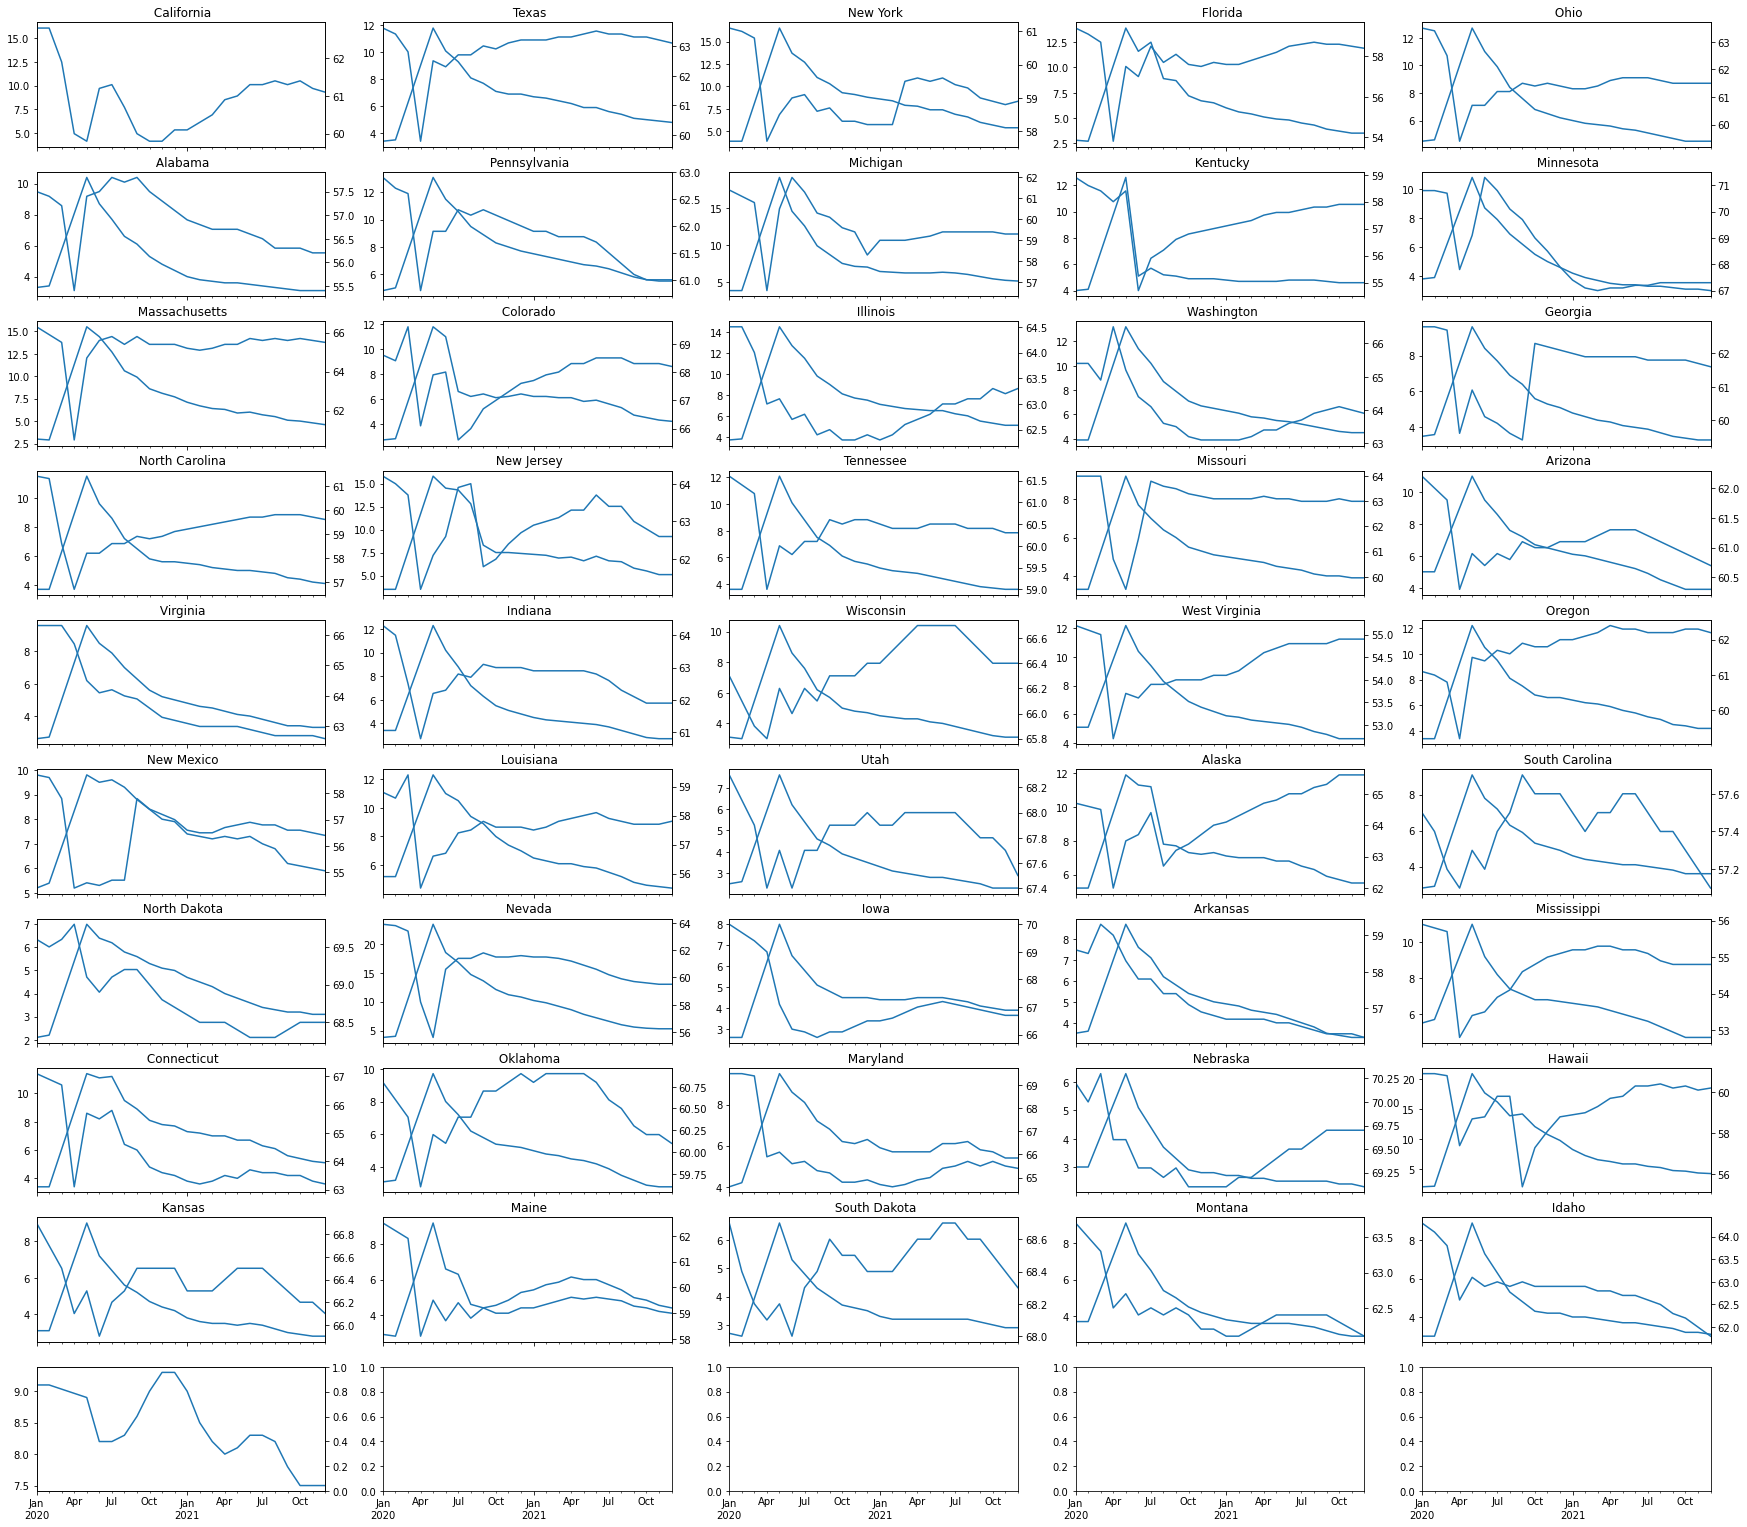

In [ ]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in dataset.columns:
    ax2 = axs[i].twinx()
    dataset.query('index >= 2020 and index < 2022')[state].plot(ax=axs[i], label='Unemployment')
    dataset2.query('index >= 2020 and index < 2022')[state].plot(ax=ax2, label='Participation')
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()